# Assignment 4.9 Part 2

### The following Script Contains:
##### 1. Installing Libraries and Uploading Data
##### 2. Recreate charts from exercise 
##### 3. Sales per hour of day Histogram
##### 4. Loyalty customer order distribution bar chart
##### 5. Sales per hour of day line chart
##### 6. Age vs dependants line chart
##### 7. Age vs spending scatterplot
##### 8. Export all visualizations

#### 1. Installing Libraries and Uploading Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create a string and import data
path = r'C:\Users\Jamie&Ken\Desktop\Data Analytics Course\Python Fundeamentals for Data Analysts\08-2024 Instacart Basket Analysis'
# Import dataframe
opc_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prods_cust_merge.pkl'))

In [7]:
# confirm import
opc_merged.shape

(32404859, 34)

In [8]:
opc_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


#### 2. Recreate charts from exercise

<Axes: xlabel='weekday_of_order'>

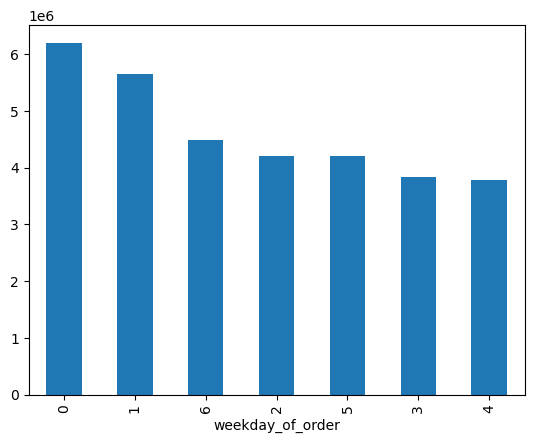

In [9]:
# creating bart chart for weekday_of_order
opc_merged['weekday_of_order'].value_counts().plot.bar()

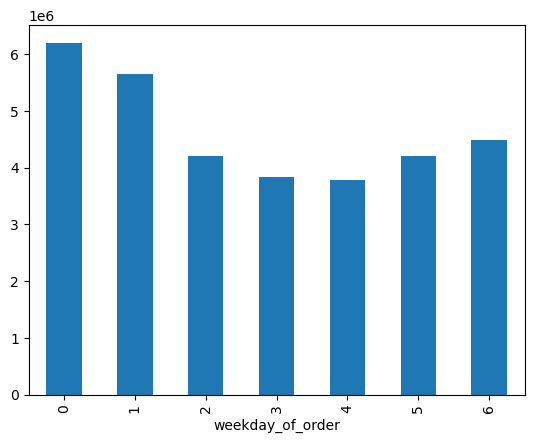

In [11]:
# sort bar by index column
bar_index = opc_merged['weekday_of_order'].value_counts().sort_index().plot.bar()

<Axes: xlabel='weekday_of_order'>

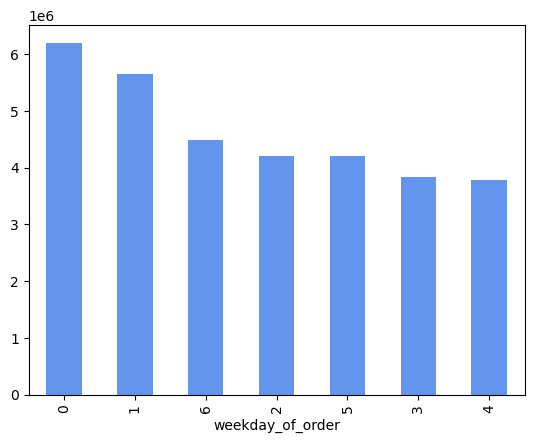

In [15]:
# change chart colour
opc_merged['weekday_of_order'].value_counts().plot.bar(color = ['cornflowerblue'])

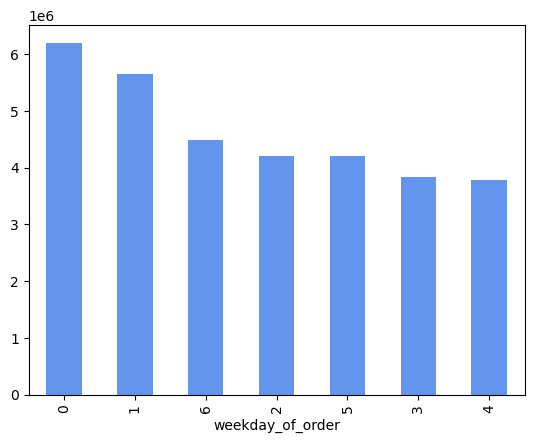

In [16]:
# save new coloured bar to memory
bar = opc_merged['weekday_of_order'].value_counts().plot.bar(color = ['cornflowerblue'])

In [18]:
# export new coloured bar
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'blue_bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

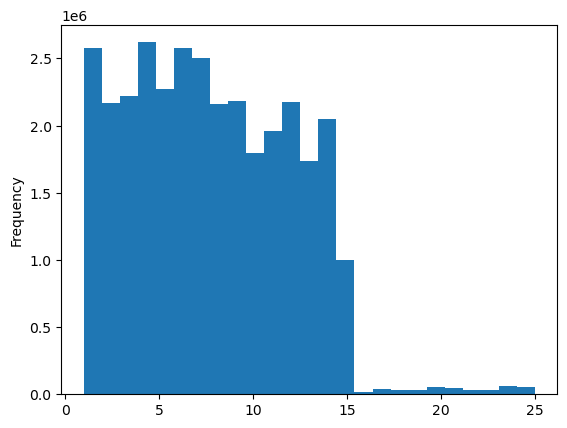

In [20]:
# Create histogram of "prices" column
opc_merged['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

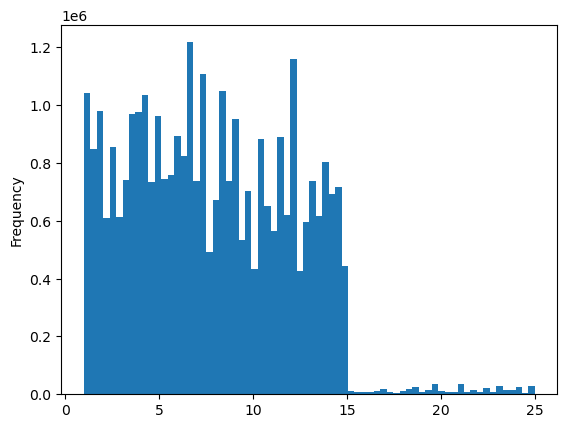

In [21]:
# Create histogram with larger bins
opc_merged['prices'].plot.hist(bins = 70)

<Axes: xlabel='prices', ylabel='prices'>

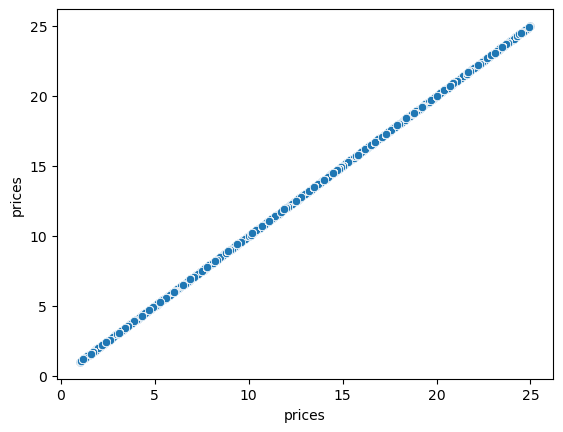

In [22]:
# Create scatterplot of "prices" column
sns.scatterplot(x = 'prices', y = 'prices',data = opc_merged)

In [24]:
# Create data sample 70/30 split
np.random.seed(4)
dev = np.random.rand(len(opc_merged)) <= 0.7

In [25]:
# Check list
dev

array([False,  True, False, ...,  True,  True,  True])

In [26]:
# split list into two samples (70/30)
big = opc_merged[dev]
small = opc_merged[~dev]

In [27]:
# verify list size 
len(opc_merged)
len(big) + len(small)

32404859

In [28]:
# filter out unneeded columns from subset - for line chart
df_2 = small[['weekday_of_order', 'prices']]

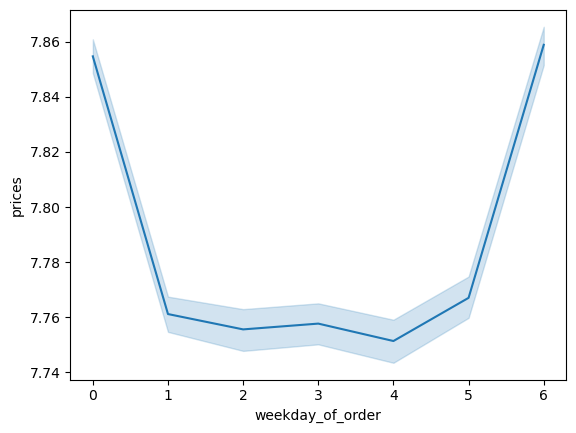

In [39]:
# create line chart
weekday_vs_prices_line = sns.lineplot(data = df_2, x = 'weekday_of_order', y = 'prices')

#### 3. Sales per hour of day histogram

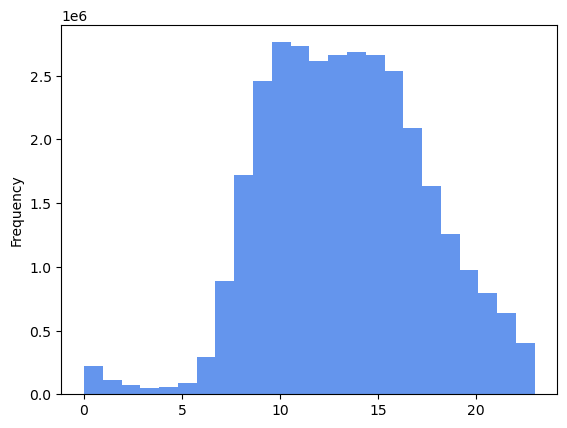

In [42]:
# create histogram of "order_hour_of_day" column
ohod_histo = opc_merged['order_hour_of_day'].plot.hist(bins = 24, color = ['cornflowerblue'])

###### The busiest hours of the day are between 8am - 4 pm. Orders are extrememly slow early morning and taper off after 4pm. The higher the bar, the more orders are placed iwhtin the hour. 

#### 4. Loyalty customer order distrubution bar chart

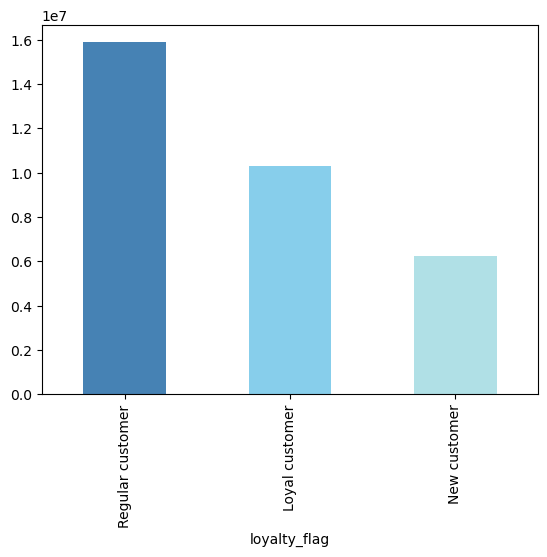

In [45]:
# create bar chart for loyalty flag column
loyalty_bar = opc_merged['loyalty_flag'].value_counts().plot.bar(color = ['steelblue', 'skyblue', 'powderblue'])

#### 5. Sales per hour of day line chart

###### Sample data sets created earlier on in 2.Recreate charts from this exerciseZ

In [35]:
# filter out unneeded columns of subset
df_3 = small[['order_hour_of_day', 'prices']]

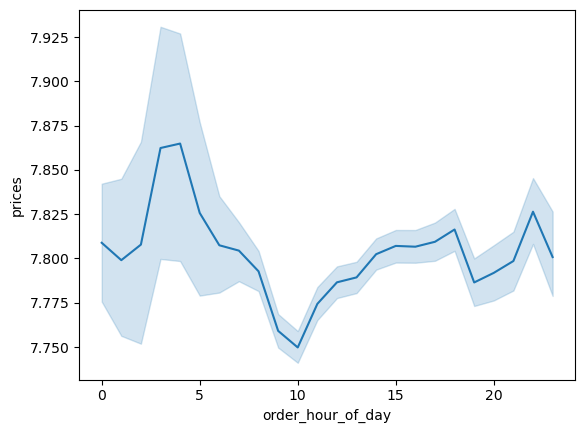

In [40]:
hour_vs_prices_line = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

#### 6. Age vs dependants line chart

In [47]:
# filter out unneeded columns of subset
df_4 = small[['age','number_of_dependants', 'income']]

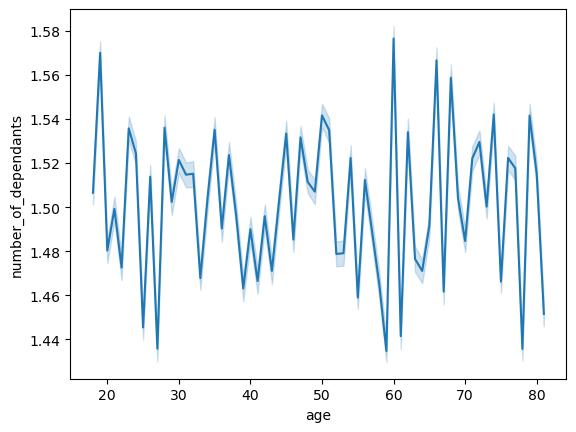

In [43]:
age_vs_depend_line = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants')

##### There is no clear correlation between the age of a customer and the number of dependants they have. 

#### 7. Age vs spending scatterplot

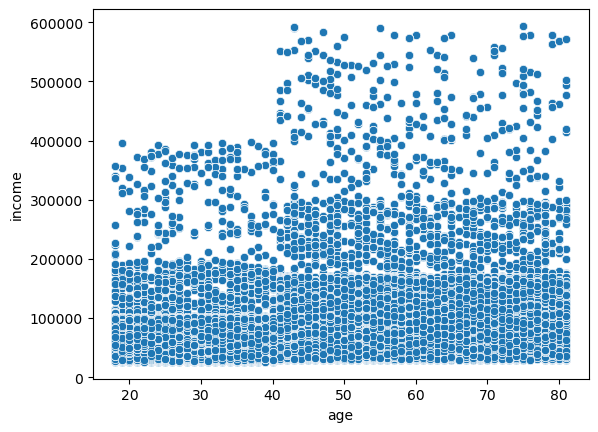

In [48]:
# using the above filtered subset create scatterplot for age vs income 
age_vs_income_scat = sns.scatterplot(x = 'age', y = 'income',data = df_4)

##### At the age of 40, there is a jump in the data indicating an increase to income. The graph from age 40 onward has many data points above the realm of 400000. The most densely packed area presents the most common income for all ages which is somewhere between 0-200,000. From 40 onwards, this remains the most common income but there is spreading of the points and an increase in incomes above this range. 

#### 8. Export visualizations

In [51]:
# export histogram
ohod_histo.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_histogram.png'))

In [54]:
# export bar chart
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

In [55]:
# export hour of day vs prices line
hour_vs_prices_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_vs_prices_line.png'))

In [56]:
# export age vs dependants correlation line
age_vs_depend_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_v_dep_cor_line.png'))

In [57]:
# export scatterplot
age_vs_income_scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_v_inc_scat.png'))